# Charger et inspecter Data.csv

## importation 

In [160]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Charger et inspecter Data.csv

In [161]:
absolute_path = "data.csv"
df_abs = pd.read_csv(absolute_path)
df_abs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Étudier les valeurs manquantes et Corrélations

In [162]:
# Convertir la colonne 'TotalCharges' en numérique (certaines valeurs peuvent être du texte)
df_abs['TotalCharges'] = pd.to_numeric(df_abs['TotalCharges'], errors='coerce')

# Calculer la moyenne (en ignorant les NaN)
mean_total = df_abs['TotalCharges'].mean()

# Remplacer les NaN par la moyenne
df_abs['TotalCharges'].fillna(mean_total, inplace=True)

# Vérifier qu'il n'y a plus de NaN
print("\nNombre de NaN dans 'TotalCharges' après traitement :", df_abs['TotalCharges'].isna().sum())

# Informations sur le DataFrame
print("\nInformations sur le DataFrame :")
print(df_abs.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df_abs.describe())

# Sauvegarder le nouveau fichier CSV
df_abs.to_csv("data_clean.csv", index=False)
print("\n✅ Fichier nettoyé enregistré sous le nom 'data_clean.csv'")


Nombre de NaN dans 'TotalCharges' après traitement : 0

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  

C:\Users\DELL\AppData\Local\Temp\ipykernel_23900\741161077.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abs['TotalCharges'].fillna(mean_total, inplace=True)


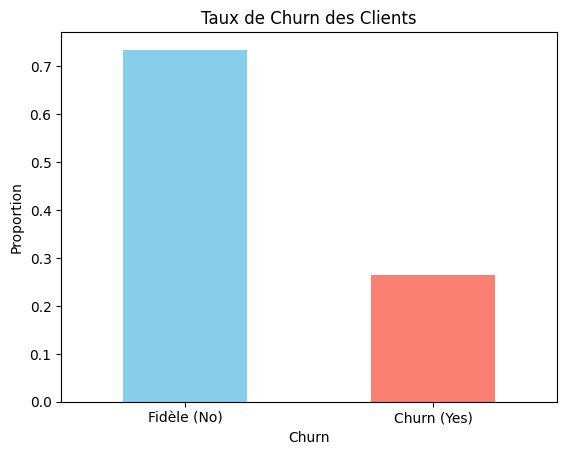

In [163]:
churn_rate = df_abs['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Taux de Churn des Clients')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['Fidèle (No)', 'Churn (Yes)'], rotation=0)
plt.show()

In [164]:
# Select columns with a specific data type (e.g., 'object' for strings/categories)
object_columns_df = df_abs.select_dtypes(include=['object']).columns
num_columns_df = df_abs.select_dtypes(include=['number']).columns

print("\nDataFrame with only 'object' (string/categorical) columns:")
print(object_columns_df)
print("\nDataFrame with only 'number' (numeric) columns:")
print(num_columns_df)


DataFrame with only 'object' (string/categorical) columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

DataFrame with only 'number' (numeric) columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [165]:
corelation = df_abs[num_columns_df].corr()
print(corelation)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


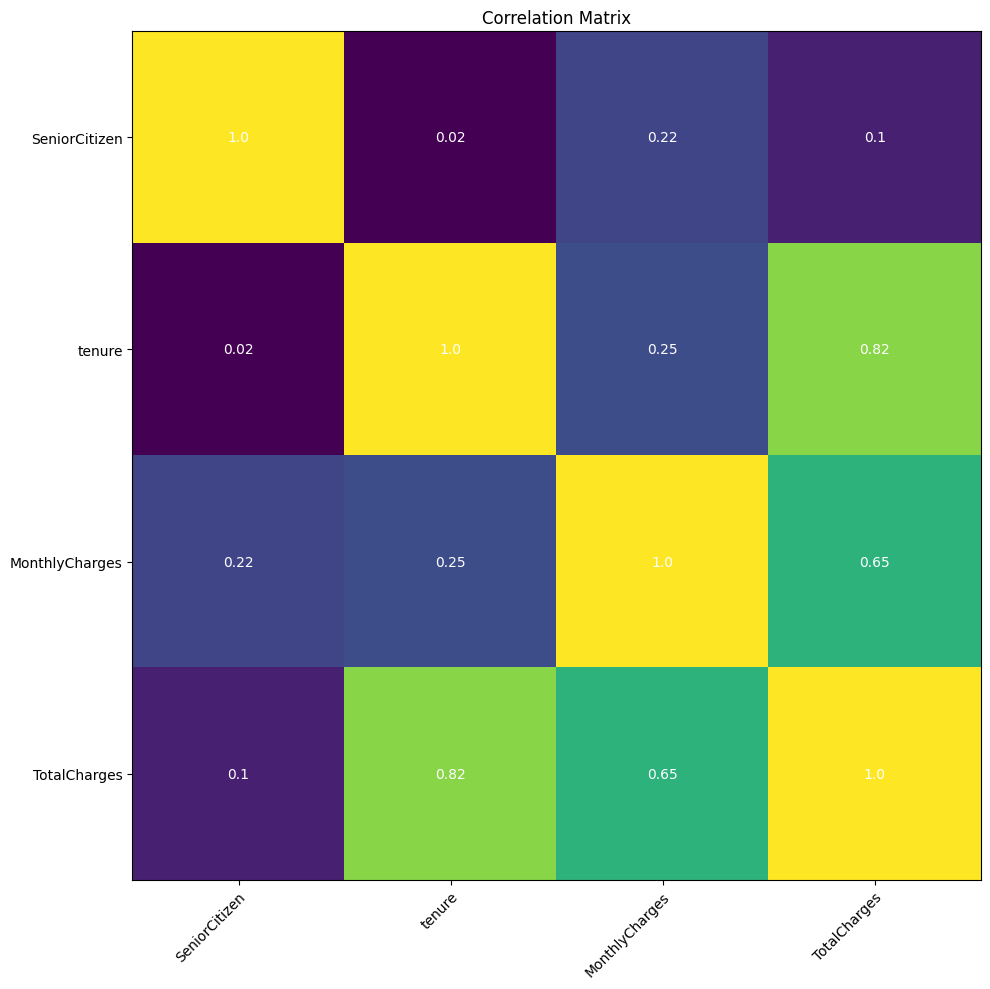

In [166]:
    fig, ax = plt.subplots(figsize=(12,10))
    im = ax.imshow(corelation)
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(range(len(corelation.columns)), labels=corelation.columns,
                rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(corelation.index)), labels=corelation.index)

    # Loop over data dimensions and create text annotations.
    for i in range(len(corelation.columns)):
        for j in range(len(corelation.index)):
            text = ax.text (j, i, round(corelation.iloc[i, j], 2),
                        ha="center", va="center", color="w")

    ax.set_title("Correlation Matrix")
    fig.tight_layout()
    plt.show()

Colonnes encodées : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

✅ Colonnes encodées (seules les object ont été transformées) :
customerID            int16
gender                 int8
SeniorCitizen         int64
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object


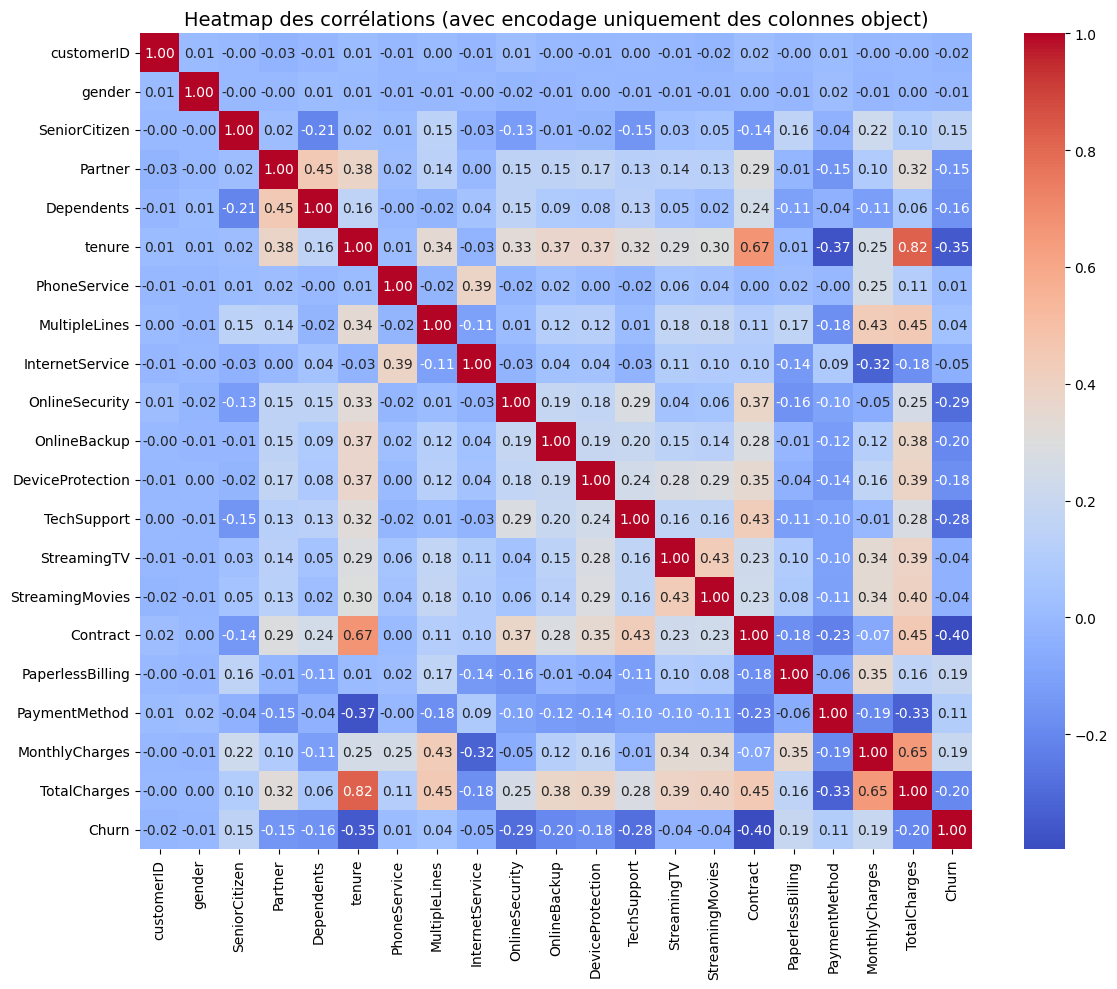


📊 Corrélations des variables avec la cible 'Churn' :

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [ ]:
# --- 1️⃣ Sélection uniquement des colonnes 'object' ---
df_encoded = df_abs.copy()

# Boucle uniquement sur les colonnes textuelles
object_cols = df_encoded.select_dtypes(include=['object']).columns

print(f"Colonnes encodées : {object_cols.tolist()}")

# Encodage des colonnes object en valeurs numériques (codes de catégories)
for col in object_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# --- 2️⃣ Vérification ---
print("\ncolonnes encodées (seules les object ont été transformées) :")
print(df_encoded.dtypes)

# --- 3️⃣ Heatmap complète sur toutes les colonnes numériques ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations (avec encodage uniquement des colonnes object)", fontsize=14)
plt.tight_layout()
plt.show()

# --- 4️⃣ Corrélations avec la variable cible ---
if 'Churn' in df_encoded.columns:
    corr_target = df_encoded.corr()['Churn'].sort_values(ascending=False)
    print("\n Corrélations des variables avec la cible 'Churn' :\n")
    print(corr_target)
else:
    print("\n La colonne 'Churn' n'existe pas dans le DataFrame.")


## SimpleImputer

In [168]:
imputer = SimpleImputer(missing_values = df_abs, strategy ='mean')
imputer

,missing_values,custome... x 21 columns]
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


## Taux de Churn des Clients par gender

## OneHotEncoder

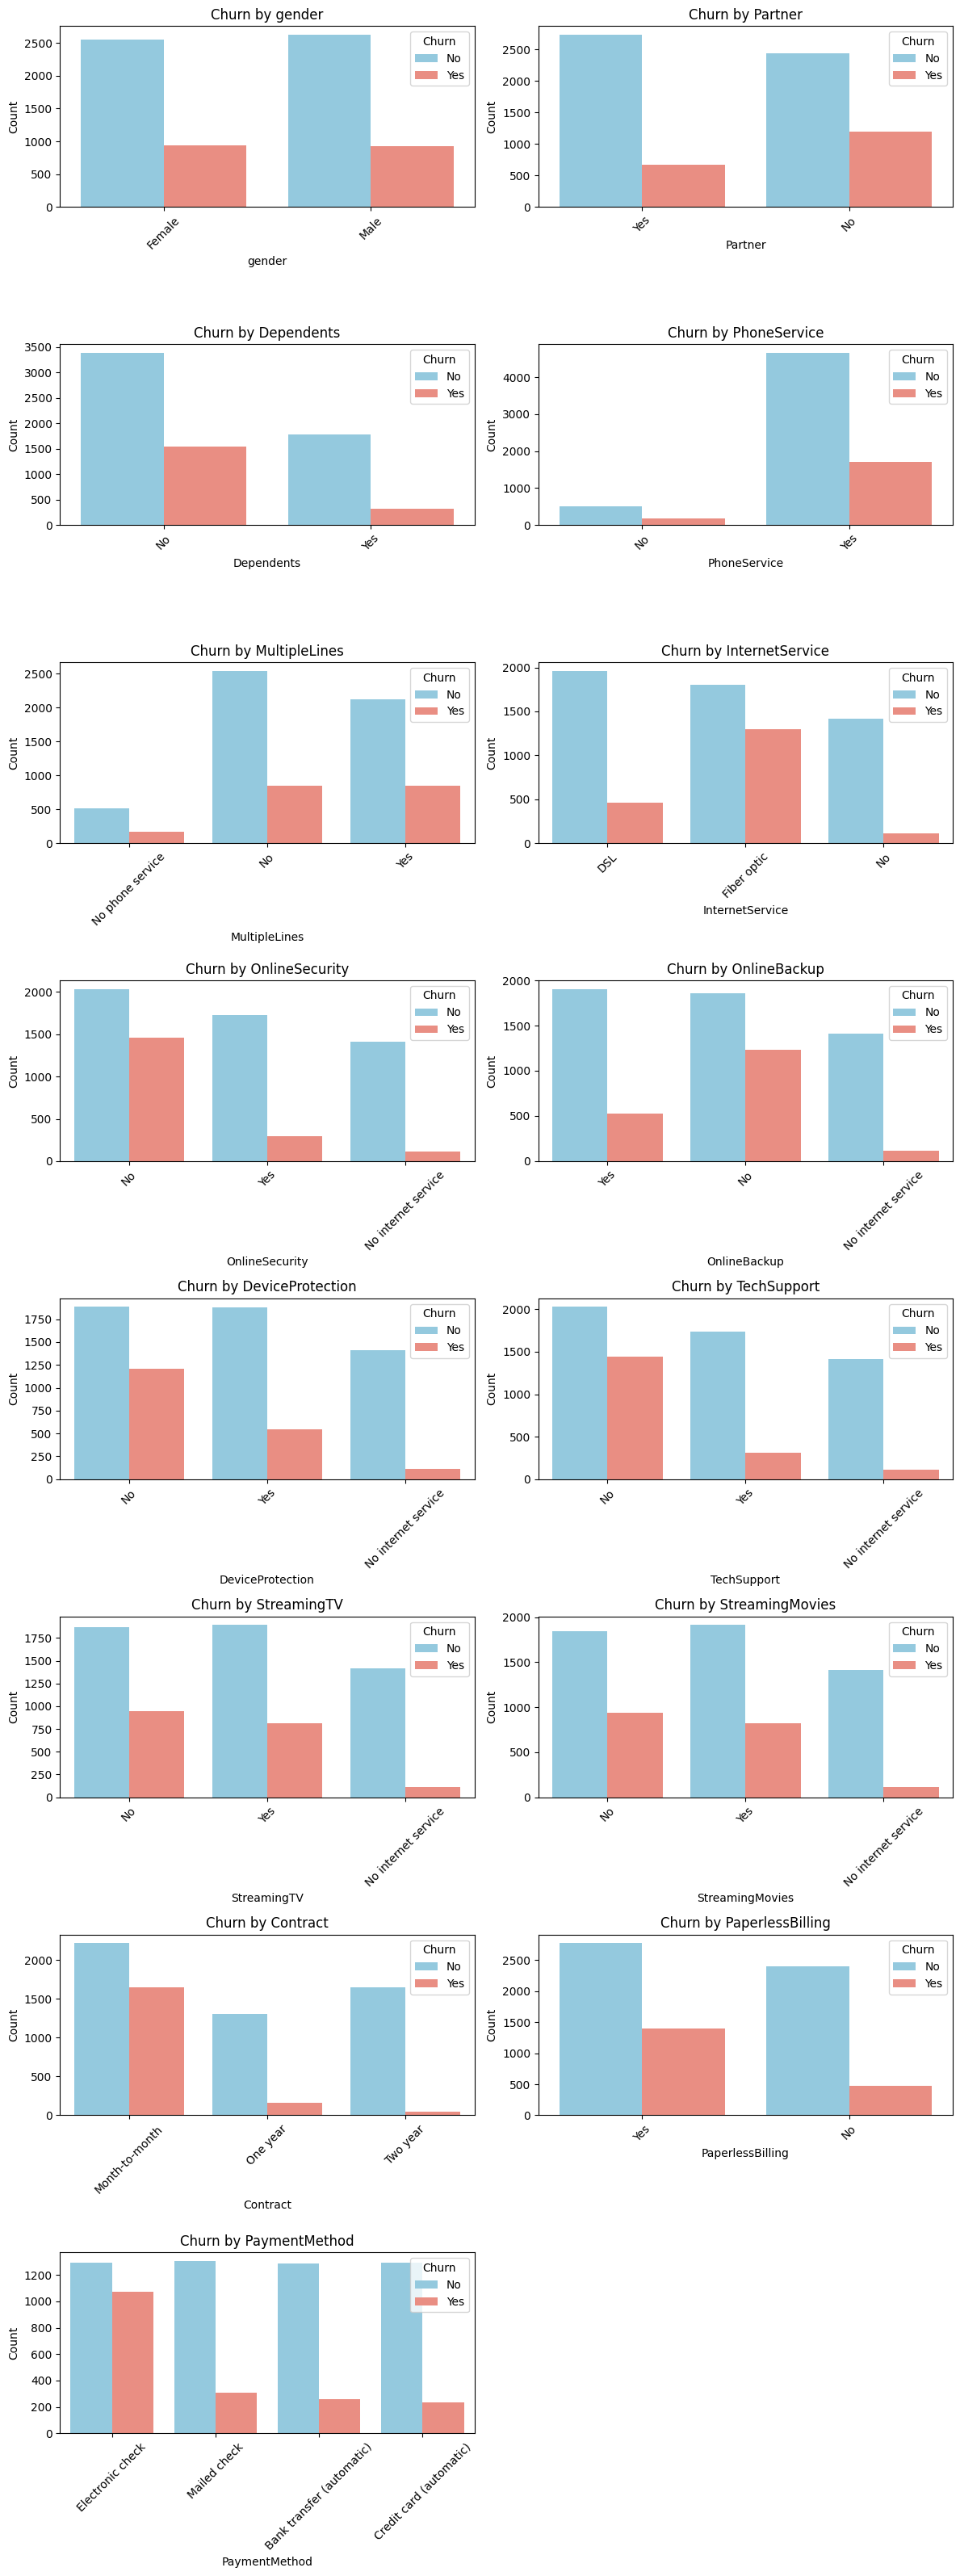

{'gender': gender
 Female    26.92
 Male      26.16
 Name: Churn, dtype: float64,
 'Partner': Partner
 No     32.96
 Yes    19.66
 Name: Churn, dtype: float64,
 'Dependents': Dependents
 No     31.28
 Yes    15.45
 Name: Churn, dtype: float64,
 'PhoneService': PhoneService
 No     24.93
 Yes    26.71
 Name: Churn, dtype: float64,
 'MultipleLines': MultipleLines
 No                  25.04
 No phone service    24.93
 Yes                 28.61
 Name: Churn, dtype: float64,
 'InternetService': InternetService
 DSL            18.96
 Fiber optic    41.89
 No              7.40
 Name: Churn, dtype: float64,
 'OnlineSecurity': OnlineSecurity
 No                     41.77
 No internet service     7.40
 Yes                    14.61
 Name: Churn, dtype: float64,
 'OnlineBackup': OnlineBackup
 No                     39.93
 No internet service     7.40
 Yes                    21.53
 Name: Churn, dtype: float64,
 'DeviceProtection': DeviceProtection
 No                     39.13
 No internet service 

In [174]:
def load_data(path):
    df = pd.read_csv(path)
    df.drop(columns=['customerID', 'gender', 'Partner'], inplace=True)
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
    return df
load_data(absolute_path)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23900\318474871.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [175]:
path = 'data.csv'
print(path)
def load_data(path):
    df = pd.read_csv(path)
    
    df.drop(columns=['customerID', 'gender', 'Partner'], inplace=True)
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
    return df


data.csv
